In [42]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [56]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [43]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [44]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [45]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [47]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences=sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(sequences=testing_sequences, maxlen=max_length)

In [48]:
reverse_word_index = dict([(value, key) for key, value in word_index.items()])

In [49]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [50]:
print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [51]:
# Model Definition with GRU
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [53]:
num_epochs = 5
history = model.fit(padded, training_labels_final, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels_final))

Epoch 1/5
782/782 [==============================] - 40s 52ms/step - loss: 0.1443 - accuracy: 0.9477 - val_loss: 0.5059 - val_accuracy: 0.8235
Epoch 2/5
782/782 [==============================] - 40s 51ms/step - loss: 0.1102 - accuracy: 0.9607 - val_loss: 0.6277 - val_accuracy: 0.8183
Epoch 3/5
782/782 [==============================] - 41s 52ms/step - loss: 0.0807 - accuracy: 0.9722 - val_loss: 0.6449 - val_accuracy: 0.7993
Epoch 4/5
782/782 [==============================] - 44s 56ms/step - loss: 0.0590 - accuracy: 0.9807 - val_loss: 0.6991 - val_accuracy: 0.8119
Epoch 5/5
782/782 [==============================] - 45s 57ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.7717 - val_accuracy: 0.8121


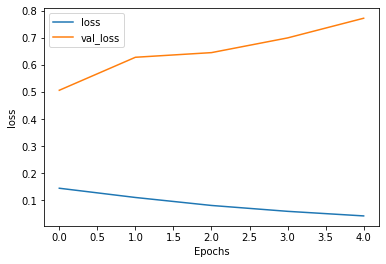

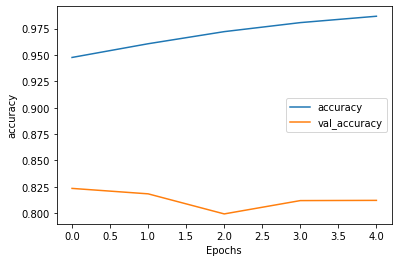

In [59]:
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')

In [60]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(padded, training_labels_final, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels_final))

Epoch 1/5
782/782 [==============================] - 44s 51ms/step - loss: 0.5840 - accuracy: 0.6486 - val_loss: 0.3785 - val_accuracy: 0.8326
Epoch 2/5
782/782 [==============================] - 36s 46ms/step - loss: 0.3039 - accuracy: 0.8785 - val_loss: 0.3712 - val_accuracy: 0.8446
Epoch 3/5
782/782 [==============================] - 40s 51ms/step - loss: 0.2311 - accuracy: 0.9142 - val_loss: 0.3879 - val_accuracy: 0.8426
Epoch 4/5
782/782 [==============================] - 39s 49ms/step - loss: 0.1918 - accuracy: 0.9307 - val_loss: 0.4235 - val_accuracy: 0.8248
Epoch 5/5
782/782 [==============================] - 43s 55ms/step - loss: 0.1694 - accuracy: 0.9395 - val_loss: 0.4534 - val_accuracy: 0.8314


In [62]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_7 ( (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________
